https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203


K-means Clustering Python Example
K-Means Clustering is an unsupervised machine learning algorithm. In contrast to traditional supervised machine learning algorithms, K-Means attempts to classify data without having first been trained with labeled data. Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the most relevant group.



The real world applications of K-Means include:
customer profiling, market segmentation, computer vision, search engines

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In this tutorial, we’ll generate our own data using the make_blobs function from the sklearn.datasets module. The centers parameter specifies the number of cluster

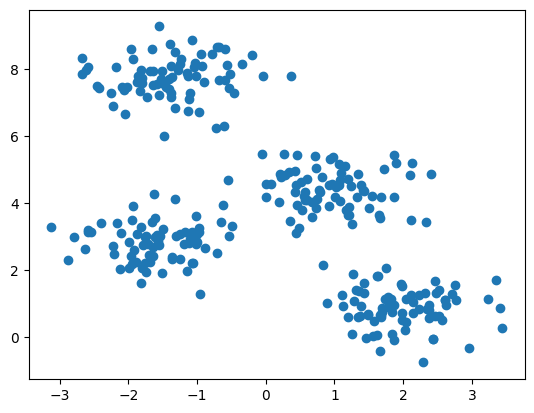

In [5]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

Even though we already know the optimal number of clusters, I figured we could still benefit from determining it using the elbow method. To get the values used in the graph, we train multiple models using a different number of clusters and storing the value of the intertia_ property (WCSS) every time.

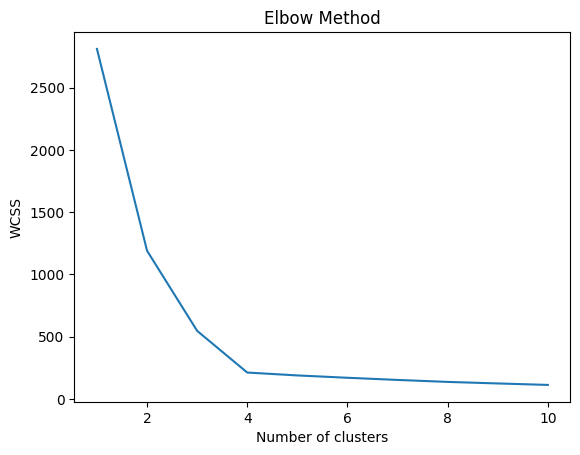

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

WCSS is defined as the sum of the squared distance between each member of the cluster and its centroid.

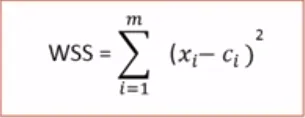

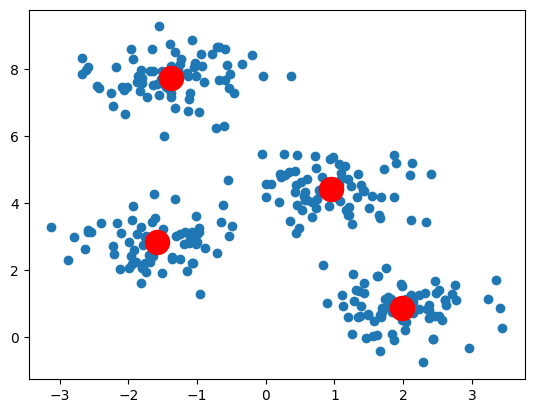

In [7]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()